## Tensor （张量）
* PyTorch 中处理的最基本的操作对象就是Tensor，表示的是一个多维的矩阵。如下示意图，零维就是一个点，一维就是向量，二维就是矩阵，多维就相当于多维数组，这和 NumPy 是对应的，而且 **PyTorch 的 Tensor 可以和 NumPy 的 ndarray 相互转换，唯一不同的是前者可以在 GPU 上运行，而后者只能在 CPU 上运行。**

<img src="./Images/tensor.jpg" width=750, heigth=300>

### 把 PyTorch 当做 NumPy 用
* PyTorch 的很多操作和 NumPy 都是类似的，但是因为其能够在 GPU 上运行，所以有着比 NumPy 快很多倍的速度。

In [2]:
import torch
import numpy as np
from torch.autograd import Variable

In [18]:
# 创建一个 numpy ndarray
numpy_tensor = np.random.randn(4, 5)
print(numpy_tensor)
print(numpy_tensor.dtype)

[[-0.20686427 -0.81371042 -1.09025823  1.6196171  -0.26244709]
 [-1.23683592  0.45255505  0.38243564  0.90032699  1.34383286]
 [-0.33081421 -1.25847333  0.34835858  0.67918023  0.04971731]
 [-0.78090567  1.46037783 -0.60218052  2.0784988   0.75044257]]
float64


* 我们可以使用下面两种方式将numpy的ndarray转换到tensor上

In [20]:
pytorch_tensor1 = torch.tensor(numpy_tensor,dtype=torch.float64)
print(pytorch_tensor1)
pytorch_tensor2 = torch.from_numpy(numpy_tensor)
print(pytorch_tensor2)

tensor([[-0.2069, -0.8137, -1.0903,  1.6196, -0.2624],
        [-1.2368,  0.4526,  0.3824,  0.9003,  1.3438],
        [-0.3308, -1.2585,  0.3484,  0.6792,  0.0497],
        [-0.7809,  1.4604, -0.6022,  2.0785,  0.7504]], dtype=torch.float64)
tensor([[-0.2069, -0.8137, -1.0903,  1.6196, -0.2624],
        [-1.2368,  0.4526,  0.3824,  0.9003,  1.3438],
        [-0.3308, -1.2585,  0.3484,  0.6792,  0.0497],
        [-0.7809,  1.4604, -0.6022,  2.0785,  0.7504]], dtype=torch.float64)


* 使用以上两种方法进行转换的时候，会直接将 NumPy ndarray 的数据类型转换为对应的 PyTorch Tensor 数据类型

* 同时我们也可以使用下面的方法将 pytorch tensor 转换为 numpy ndarray
* 需要注意 GPU 上的 Tensor 不能直接转换为 NumPy ndarray，需要使用.cpu()先将 GPU 上的 Tensor 转到 CPU 上

In [10]:
# 如果 pytorch tensor 在 cpu 上
numpy_array = pytorch_tensor1.numpy()
print(numpy_array)

# 如果 pytorch tensor 在 gpu 上
numpy_array = pytorch_tensor1.cpu().numpy()

[[-0.89924081  0.61037961 -1.23154489  0.08557894 -0.98492479]
 [ 1.78812816 -1.1839331   1.6943687   1.02783301 -0.46929173]
 [ 0.4528172  -0.60487508  1.89272887  1.2121682   2.18522087]
 [-1.82837114  0.66942428 -1.78702466 -0.25672374  0.8285337 ]]


* **PyTorch Tensor 使用 GPU 加速**，我们可以使用以下两种方式将 Tensor 放到 GPU 上

In [15]:
# 判定是否有 GPU 可用
print('GPU available? ——>',torch.cuda.is_available())

# 第一种方式是定义 cuda 数据类型
dtype = torch.cuda.FloatTensor # 定义默认 GPU 的 数据类型
gpu_tensor = torch.randn(10, 20).type(dtype)

# 第二种方式更简单，推荐使用
gpu_tensor = torch.randn(10, 20).cuda(0) # 将 tensor 放到第一个 GPU 上
gpu_tensor = torch.randn(10, 20).cuda(1) # 将 tensor 放到第二个 GPU 上

GPU available? ——> False


* 使用第一种方式将 tensor 放到 GPU 上的时候会将数据类型转换成定义的类型，而用第二种方式能够直接将 tensor 放到 GPU 上，类型跟之前保持一致。

* **推荐在定义 tensor 的时候就明确数据类型（比如上面执行torch.tensor()时指定dtype参数），然后直接使用第二种方法将 tensor 放到 GPU 上。**

* 而将 tensor 放回 CPU 的操作非常简单

In [ ]:
cpu_tensor = gpu_tensor.cpu()

* 访问 Tensor 的属性

In [21]:
## 得到 tensor 的大小
print(pytorch_tensor1.shape)

# 得到 tensor 的数据类型
print(pytorch_tensor1.type())

# 得到 tensor 的维度
print(pytorch_tensor1.dim())

# 得到 tensor 的所有元素个数
print(pytorch_tensor1.numel())

torch.Size([4, 5])
torch.DoubleTensor
2
20


### Tensor 的基本操作
* Tensor 操作中的 api 和 NumPy 非常相似，如果你熟悉 NumPy 中的操作，那么 tensor 基本是一致的，以下列举其中的一些操作
* <pr> .dtype属性是得到元素的数据类型，type()是得到数据结构类型，tensor 数据类型可参考 https://pytorch.org/docs/0.3.0/tensors.html

In [26]:
x = torch.ones(2, 2)
print(x, x.dtype, x.type()) 

tensor([[1., 1.],
        [1., 1.]]) torch.float32 torch.FloatTensor


In [29]:
# 将其转化为整形
x = x.long()
# x = x.type(torch.LongTensor)  # 两种方式都可以
print(x, x.dtype, x.type())

# 再将其转回 float
x = x.float()
# x = x.type(torch.FloatTensor)
print(x, x.dtype, x.type())

tensor([[1, 1],
        [1, 1]]) torch.int64 torch.LongTensor
tensor([[1., 1.],
        [1., 1.]]) torch.float32 torch.FloatTensor


In [30]:
# 新建一个 float32的 tensor
x = torch.randn(4, 3)
print(x, x.dtype)

tensor([[-1.5075,  0.2061,  0.2546],
        [-1.6923,  0.3566, -0.3965],
        [ 1.2329,  2.0489,  0.1152],
        [ 1.2037,  0.1911,  0.7752]]) torch.float32


In [32]:
# 沿着行取最大值
max_value, max_idx = torch.max(x, dim=1)  ## 类似np.max(x, dim=1)，返回的第一个是每行的最大值，第二个是最大值的下标
print(max_value, max_idx)

tensor([0.2546, 0.3566, 2.0489, 1.2037]) tensor([2, 1, 1, 0])


In [33]:
# 沿着行对 x 求和
sum_x = torch.sum(x, dim=1)
print(sum_x)

tensor([-1.0468, -1.7322,  3.3971,  2.1699])


* 改变维度（增加、减少、互换、改造）

In [34]:
# 增加维度或者减少维度
print(x.shape)

x = x.unsqueeze(0) # 在第一维增加
print(x.shape)

x = x.unsqueeze(1) # 在第二维增加
print(x.shape)

torch.Size([4, 3])
torch.Size([1, 4, 3])
torch.Size([1, 1, 4, 3])


In [35]:
x = x.squeeze(0) # 减少第一维
print(x.shape)

x = x.squeeze() # 将 tensor 中所有的一维全部都去掉
print(x.shape)

torch.Size([1, 4, 3])
torch.Size([4, 3])


In [41]:
x = torch.randn(3, 4, 5)
print(x.shape)

# 使用permute和transpose进行维度交换
x = x.permute(1, 0, 2) # permute 可以重新排列 tensor 的维度
print(x.shape)

x = x.transpose(0, 2)  # transpose 交换 tensor 中的两个维度
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([4, 3, 5])
torch.Size([5, 3, 4])


In [37]:
# 使用 view 对 tensor 进行 reshape
x = torch.randn(3, 4, 5)
print(x.shape)

x = x.view(-1, 5) # -1 表示任意的大小，5 表示第二维变成 5
print(x.shape)

x = x.view(3, 20) # 重新 reshape 成 (3, 20) 的大小
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([12, 5])
torch.Size([3, 20])


* 基本的四则运算（元素级操作）

In [46]:
x = torch.randn(3, 4)
y = torch.randn(3, 4)

# 两个 tensor 求和
z = x + y  # z = torch.add(x, y)
m = x * y
print(z)
print(m)

tensor([[ 2.0366, -1.5867, -0.7534, -0.4305],
        [ 1.6674, -0.8818,  1.9291,  0.2475],
        [ 1.3854,  1.7577,  0.8529, -0.0385]])
tensor([[ 0.9495,  0.6282, -0.4515, -0.1176],
        [ 0.5759, -0.2458,  0.6417, -0.9131],
        [ 0.4784,  0.5167, -1.7392, -0.8053]])


* 另外，pytorch中大多数的操作都支持 inplace 操作，也就是可以直接对 tensor 进行操作而不需要另外开辟内存空间，方式非常简单，一般都是在操作的符号后面加_，比如

In [47]:
x = torch.ones(3, 3)
print(x.shape)

# unsqueeze 进行 inplace
x.unsqueeze_(0)
print(x.shape)

# transpose 进行 inplace
x.transpose_(1, 0)
print(x.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])
torch.Size([3, 1, 3])


In [48]:
x = torch.ones(3, 3)
y = torch.ones(3, 3)
print(x)

# add 进行 inplace
x.add_(y)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


**小练习**

访问[文档](http://pytorch.org/docs/0.3.0/tensors.html)了解 tensor 更多的 api，实现下面的要求

创建一个 float32、4 x 4 的全为1的矩阵，将矩阵正中间 2 x 2 的矩阵，全部修改成2

参考输出
$$
\left[
\begin{matrix}
1 & 1 & 1 & 1 \\
1 & 2 & 2 & 1 \\
1 & 2 & 2 & 1 \\
1 & 1 & 1 & 1
\end{matrix}
\right] \\
torch.FloatTensor
$$

In [55]:
# 答案
x = torch.ones(4, 4).float()
x[1:3, 1:3] = 2
print(x, x.type())

tensor([[1., 1., 1., 1.],
        [1., 2., 2., 1.],
        [1., 2., 2., 1.],
        [1., 1., 1., 1.]]) torch.FloatTensor


## Variable （变量）
* <p>tensor 是 PyTorch 中的完美组件，但是构建神经网络还远远不够，我们需要能够构建计算图的 tensor，这就是 Variable，**关键在于 Variable 提供了自动求导的功能。**

* <p>Variable 和 tensor 本质上没有区别，不过 Variable 会被放入一个计算图中，然后进行前向传播，反向传播，自动求导。**Variable 有三个重要的组成特性：data, grad，grad_fn**，通过 data 可以取出 Variable 里面的 tensor 数值，grad_fn 表示的是得到这个 Variable 的操作，比如通过加减还是乘除来得到的，最后 grad 是这个 Variable 的反向传播梯度。

In [2]:
# 通过下面这种方式导入 Variable
from torch.autograd import Variable

In [6]:
x_tensor = torch.randn(10, 5)
y_tensor = torch.randn(10, 5)

# 将 tensor 变成 Variable
x = Variable(x_tensor, requires_grad=True) # 默认 Variable 是不需要求梯度的，所以我们用这个方式申明需要对其进行求梯度
y = Variable(y_tensor, requires_grad=True)

# 可用 x.requires_grad查看该variable是否可导
print(x.requires_grad)

In [15]:
z = torch.sum(2 * x + y)
print(z.data)
print(z.grad_fn)

tensor(28.0715)


* 上面打出了 z 中的 tensor 数值，同时通过grad_fn知道了其是通过 Sum 这种方式得到的

In [16]:
# 求 x 和 y 的梯度
z.backward()

print(x.grad)
print(y.grad)

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


* 通过.grad我们得到了 x 和 y 的梯度，这里我们使用了 PyTorch 提供的自动求导机制，非常方便，下一小节会具体讲自动求导。

## 自动微分
* 自动求导是 PyTorch 中非常重要的特性，能够让我们避免手动去计算非常复杂的导数，这能够极大地减少我们构建模型的时间，这也是其前身 Torch 这个框架所不具备的特性。

### 简单情况的自动微分
* "简单"体现在计算的结果都是标量，也就是一个数，我们对这个标量进行求导。

比如：
$$
z = (x + 2)^2 + 3
$$

z 对 x 求导在 x = 2 的结果就是 

$$
\frac{\partial z}{\partial x} = 2 (x + 2) = 2 (2 + 2) = 8
$$

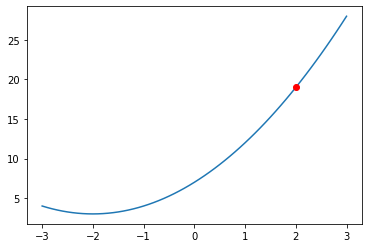

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-3, 3.01, 0.1)
f = lambda x: (x + 2) ** 2 + 3
plt.plot(x, f(x))
plt.plot(2, f(2), 'ro')

In [22]:
x = Variable(torch.Tensor([2]), requires_grad=True)
z = f(x)  ## 这也是体现动态图优点的地方，直接把tensor当成numpy.ndarray用
print(z)

z.backward()
print(x.grad)  

tensor([19.], grad_fn=<AddBackward0>)


* 对于上面这样一个简单的例子，我们验证了自动微分，同时可以发现发现使用自动微分非常方便。如果是一个更加复杂的例子，那么手动微分就会显得非常的麻烦，所以自动微分的机制能够帮助我们省去麻烦的数学计算，下面我们可以看一个更加复杂的例子。

In [43]:
x = Variable(torch.randn(5, 10), requires_grad=True)
y = Variable(torch.randn(5, 5), requires_grad=True)
w = Variable(torch.randn(10, 5), requires_grad=True)

out = torch.mean(y - torch.matmul(x, w)) # torch.matmul 是做矩阵乘法
out.backward()

In [44]:
# 得到 x 的梯度
print(x.grad, x.shape)  ## 计算的是out这个标量对 x 这个 tensor 中每一个元素的梯度
# 关于标量对tensor中的每个元素进行求导，可参考一个blog (https://www.cnblogs.com/marsggbo/p/11549631.html)

tensor([[ 0.1764,  0.0849, -0.0340,  0.0544,  0.0345, -0.1569,  0.0832, -0.0068,
          0.0255, -0.1073],
        [ 0.1764,  0.0849, -0.0340,  0.0544,  0.0345, -0.1569,  0.0832, -0.0068,
          0.0255, -0.1073],
        [ 0.1764,  0.0849, -0.0340,  0.0544,  0.0345, -0.1569,  0.0832, -0.0068,
          0.0255, -0.1073],
        [ 0.1764,  0.0849, -0.0340,  0.0544,  0.0345, -0.1569,  0.0832, -0.0068,
          0.0255, -0.1073],
        [ 0.1764,  0.0849, -0.0340,  0.0544,  0.0345, -0.1569,  0.0832, -0.0068,
          0.0255, -0.1073]]) torch.Size([5, 10])


In [45]:
# 得到 y 的的梯度
print(y.grad)

tensor([[0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400, 0.0400, 0.0400]])


In [46]:
# 得到 w 的梯度
print(w.grad)

tensor([[-0.1318, -0.1318, -0.1318, -0.1318, -0.1318],
        [-0.1305, -0.1305, -0.1305, -0.1305, -0.1305],
        [ 0.1838,  0.1838,  0.1838,  0.1838,  0.1838],
        [-0.0514, -0.0514, -0.0514, -0.0514, -0.0514],
        [ 0.0860,  0.0860,  0.0860,  0.0860,  0.0860],
        [ 0.1954,  0.1954,  0.1954,  0.1954,  0.1954],
        [-0.0685, -0.0685, -0.0685, -0.0685, -0.0685],
        [ 0.0226,  0.0226,  0.0226,  0.0226,  0.0226],
        [-0.0282, -0.0282, -0.0282, -0.0282, -0.0282],
        [ 0.0371,  0.0371,  0.0371,  0.0371,  0.0371]])


梯度的size是跟被求梯度的量一样的。

### 复杂情况的自动微分
* 上面展示了简单情况下的自动求导，都是对标量进行自动求导，那么如何对一个向量或者矩阵自动求导呢？

In [4]:
m = Variable(torch.FloatTensor([[2, 3]]), requires_grad=True) # 构建一个 1 x 2 的矩阵
n = Variable(torch.zeros(1, 2)) # 构建一个相同大小的 0 矩阵
print(m)
print(n)

tensor([[2., 3.]], requires_grad=True)
tensor([[0., 0.]])


In [5]:
# 通过 m 中的值计算新的 n 中的值
n[0, 0] = m[0, 0] ** 2
n[0, 1] = m[0, 1] ** 3
print(n)

tensor([[ 4., 27.]], grad_fn=<CopySlices>)


将上面的式子写成数学公式，可以得到 
$$
n = (n_0,\ n_1) = (m_0^2,\ m_1^3) = (2^2,\ 3^3) 
$$


下面我们直接对 n 进行反向传播，也就是求 n 对 m 的导数。

这时我们需要明确这个导数的定义，即如何定义

$$
\frac{\partial n}{\partial m} = \frac{\partial (n_0,\ n_1)}{\partial (m_0,\ m_1)}
$$

在 PyTorch 中，**如果要调用自动微分，需要往`backward()`中传入一个参数，这个参数的形状和 n 一样大**，比如是 $(w_0,\ w_1)$，那么自动求导的结果就是：
$$
\frac{\partial n}{\partial m_0} = w_0 \frac{\partial n_0}{\partial m_0} + w_1 \frac{\partial n_1}{\partial m_0}
$$
$$
\frac{\partial n}{\partial m_1} = w_0 \frac{\partial n_0}{\partial m_1} + w_1 \frac{\partial n_1}{\partial m_1}
$$

In [6]:
n.backward(torch.ones_like(n),create_graph=True) # 将 (w0, w1) 取成 (1, 1)
print(m.grad)

tensor([[ 4., 27.]], grad_fn=<CloneBackward>)


* 除了backward()，另一种写法如下，并指定 grad_outputs参数，这个参数跟上面 backward()中传入的参数功能一样。

In [7]:
m_grad = torch.autograd.grad(n, m, grad_outputs=torch.ones_like(n),create_graph=True)
print(m_grad)

(tensor([[ 4., 27.]], grad_fn=<AddBackward0>),)


通过自动微分我们得到了梯度是 4 和 27，我们可以验算一下
$$
\frac{\partial n}{\partial m_0} = w_0 \frac{\partial n_0}{\partial m_0} + w_1 \frac{\partial n_1}{\partial m_0} = 2 m_0 + 0 = 2 \times 2 = 4
$$
$$
\frac{\partial n}{\partial m_1} = w_0 \frac{\partial n_0}{\partial m_1} + w_1 \frac{\partial n_1}{\partial m_1} = 0 + 3 m_1^2 = 3 \times 3^2 = 27
$$
通过验算我们可以得到相同的结果

### 多次自动微分
* 通过调用 backward 我们可以进行一次自动求导，如果我们再调用一次 backward，会发现程序报错，没有办法再做一次。这是因为 PyTorch 默认做完一次自动求导之后，计算图就被丢弃了，所以两次自动求导需要手动设置一个东西，我们通过下面的小例子来说明。

In [13]:
x = Variable(torch.FloatTensor([3]), requires_grad=True)
y = x * 2 + x ** 2 + 3
print(y)

tensor([18.], grad_fn=<AddBackward0>)


In [14]:
y.backward(retain_graph=True) # 设置 retain_graph 为 True 来保留计算图
print(x.grad)  ## y_x = 2 + 2 * x

tensor([8.])


In [15]:
y.backward(retain_graph=True) # 设置 retain_graph 为 True 来保留计算图
print(x.grad)  

tensor([16.])


* 可以发现 x 的梯度变成了 16，因为这里做了两次自动求导，是将第一次的梯度 8 和第二次的梯度 8 加起来得到了 16 的结果。

* <p> 通过设置 retain_graph=True 来保留计算图，以便多次求导。并且要注意，多次求导的话，它的导数值会不断累加。但是可以在求了一次导（设置retain\_graph=True）之后，用 x.grad.data.zero_() 来清除之前的导数

In [17]:
x.grad.data.zero_()
y.backward(retain_graph=True) # 设置 retain_graph 为 True 来保留计算图
print(x.grad) 

tensor([8.])


**小练习**

定义

$$
x = 
\left[
\begin{matrix}
x_0 \\
x_1
\end{matrix}
\right] = 
\left[
\begin{matrix}
2 \\
3
\end{matrix}
\right]
$$

$$
k = (k_0,\ k_1) = (x_0^2 + 3 x_1,\ 2 x_0 + x_1^2)
$$

我们希望求得

$$
j = \left[
\begin{matrix}
\frac{\partial k_0}{\partial x_0} & \frac{\partial k_0}{\partial x_1} \\
\frac{\partial k_1}{\partial x_0} & \frac{\partial k_1}{\partial x_1}
\end{matrix}
\right]
$$

参考答案：

$$
\left[
\begin{matrix}
4 & 3 \\
2 & 6 \\
\end{matrix}
\right]
$$

In [10]:
x = Variable(torch.FloatTensor([2,3]),requires_grad=True)
k = Variable(torch.zeros_like(x))
k[0] = x[0] ** 2 + 3 * x[1]
k[1] = 2 * x[0] + x[1] ** 2


j = torch.zeros(2,2)
k.backward(torch.FloatTensor([1, 0]), retain_graph=True)
j[0] = x.grad.data

x.grad.data.zero_() # 这里需要对k做第二次求导，所以先归零之前求得的梯度

k.backward(torch.FloatTensor([0, 1]))
j[1] = x.grad.data
print(j)

tensor([[4., 3.],
        [2., 6.]])


* 也可以用torch.autograd.grad()来算梯度，因为没有使用 backward 来算 k 对 x 的梯度，所以梯度不会累加，那么就不用清零。

In [11]:
x = Variable(torch.FloatTensor([2,3]),requires_grad=True)
k = Variable(torch.zeros_like(x))
k[0] = x[0] ** 2 + 3 * x[1]
k[1] = 2 * x[0] + x[1] ** 2

j = torch.zeros(2,2)
k_1 = torch.autograd.grad(k, x, grad_outputs=torch.FloatTensor([1, 0]),retain_graph=True)
k_2 = torch.autograd.grad(k, x, grad_outputs=torch.FloatTensor([0, 1]),retain_graph=True)
j[0,:] = k_1[0]
j[1,:] = k_2[0]
print(j)

tensor([[4., 3.],
        [2., 6.]])
